In [82]:
import pandas
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [83]:
data = pandas.read_csv("wine-regions.csv")
data.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [84]:
data.shape

(178, 13)

In [85]:
# redukce dat
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [86]:
tsne = TSNE(n_components=2, random_state=42)
data = tsne.fit_transform(data)
data

array([[ 12.998589  ,  -1.1536897 ],
       [  9.188797  ,   0.4948236 ],
       [ 12.530824  ,   3.6160018 ],
       [ 14.506006  ,   1.2955277 ],
       [  9.127875  ,   6.0321903 ],
       [ 14.335158  ,   2.1375043 ],
       [ 11.022933  ,   1.6687837 ],
       [ 10.636756  ,   4.9076514 ],
       [ 11.341965  ,   1.0765609 ],
       [ 12.180917  ,   0.889336  ],
       [ 13.898942  ,   3.1659727 ],
       [ 10.228752  ,   2.0921063 ],
       [ 10.827698  ,   2.369796  ],
       [ 16.189568  ,   1.5802655 ],
       [ 15.74081   ,   1.7325054 ],
       [ 11.444905  ,   4.6304603 ],
       [ 12.303036  ,   5.1403546 ],
       [ 11.926991  ,   5.313145  ],
       [ 14.855676  ,   2.875694  ],
       [ 10.817628  ,  -1.6978673 ],
       [ 12.67534   ,  -1.0987208 ],
       [  7.41849   ,  -0.80255693],
       [  9.794622  ,   1.3625469 ],
       [  8.281516  ,   2.5826042 ],
       [  8.103887  ,   2.9035976 ],
       [  8.940241  ,   6.695212  ],
       [ 10.387742  ,   3.3006701 ],
 

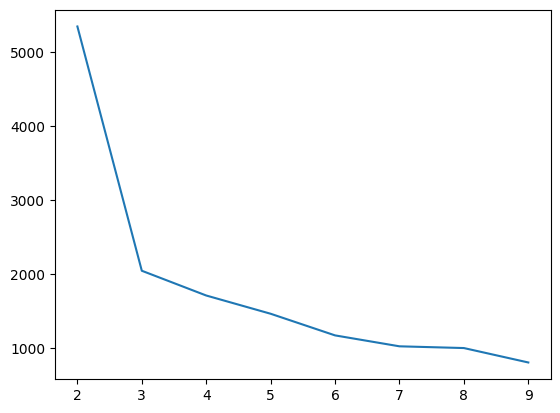

In [87]:
distances = []
cluster_counts = range(2,10)

for k in cluster_counts:
    model = KMeans(n_clusters = k, n_init = "auto") 
    model.fit(data)
    distances.append(model.inertia_)
    
plt.plot(cluster_counts, distances)

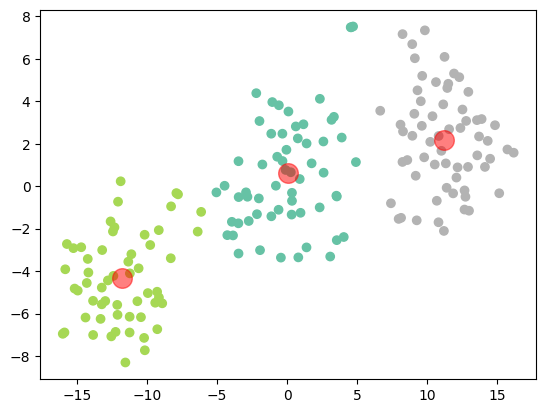

In [88]:
model = KMeans(n_clusters = 3, random_state=42,n_init = "auto") 
labels = model.fit_predict(data)
plt.scatter(data[:,0],data[:,1], c = labels, cmap = "Set2")
centers = model.cluster_centers_ 
plt.scatter(centers[:,0], centers[:,1],c = "red", s = 200, alpha=0.5) 

In [89]:
data2 = pandas.read_csv("wine-regions.csv")
data2.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [90]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

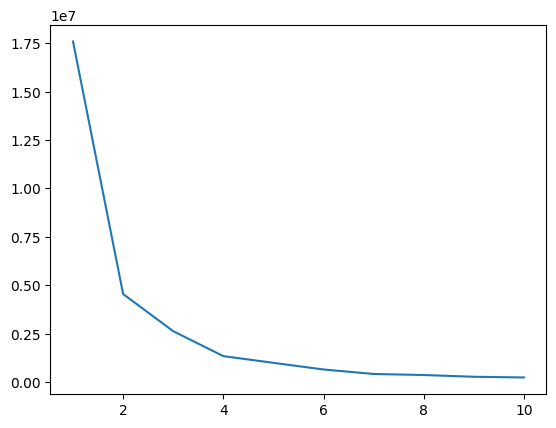

In [91]:
distances2 = []
cluster_counts2 = range(1,11)

for k in cluster_counts2:
    model2 = KMeans(n_clusters = k, n_init = "auto") 
    model2.fit(data2)
    distances2.append(model2.inertia_)
    
plt.plot(cluster_counts2, distances2)

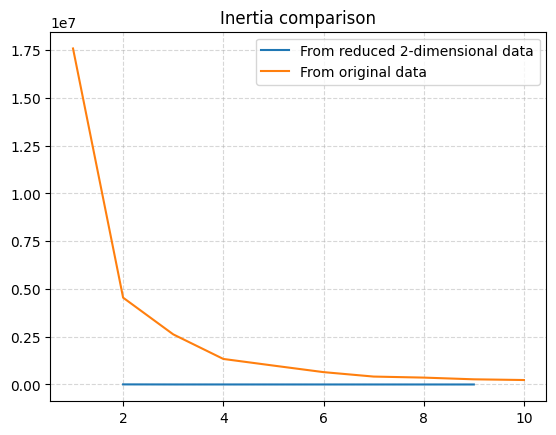

In [92]:
plt.plot(cluster_counts, distances, label="From reduced 2-dimensional data")
plt.plot(cluster_counts2, distances2, label="From original data")
plt.legend(loc="best", bbox_to_anchor=(1, 1))
plt.title("Inertia comparison")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [93]:
# vypocet prumernych hodnot
data2["cluster"] = labels # labels = model.fit_predict(X) 
data2

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [94]:
data2.groupby("cluster").mean() # prumerne hodnoty v jednotlivych clusterech

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
cluster,,,,,,,,,,,,,
0,12.221833,1.911333,2.212333,20.086667,92.400000,2.277500,2.115667,0.354000,1.703000,2.963833,1.063167,2.858167,504.383333
1,13.061607,3.166607,2.412857,21.003571,99.857143,1.694286,0.847857,0.449464,1.129286,6.850179,0.721000,1.727321,624.946429
2,13.699194,1.997742,2.473871,17.559677,106.741935,2.854839,3.012742,0.290323,1.899355,5.466129,1.068710,3.171935,1091.725806


In [95]:
data2.groupby("cluster").size() # pocet radku jednotlivych clusteru

cluster
0    60
1    56
2    62
dtype: int64